In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Setting Visualization
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
df = pd.read_csv('../data/sales_data.csv')

## Quick View

In [3]:
df.head()
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# Data clearing

In [4]:
df = df.dropna()  # Missing Values

In [5]:
df = df.drop_duplicates()  # Duplicates

In [6]:
# Data Types
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Sales'] = df['Sales'].astype(float)

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = df['Sales'].astype(float)

In [8]:
# Quick View
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   object        
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Primary data analysis (EDA)

In [9]:
total_sales = df['Sales'].sum()
total_orders = df['Order ID'].nunique()
avg_sales = df['Sales'].mean()
print("Total sales:", total_sales)
print("Total number of orders:", total_orders)
print("Average order value:", avg_sales)

Total sales: 2252607.4127
Total number of orders: 4916
Average order value: 230.1161929410563


# Sales by category and subcategory

<Axes: xlabel='Category'>

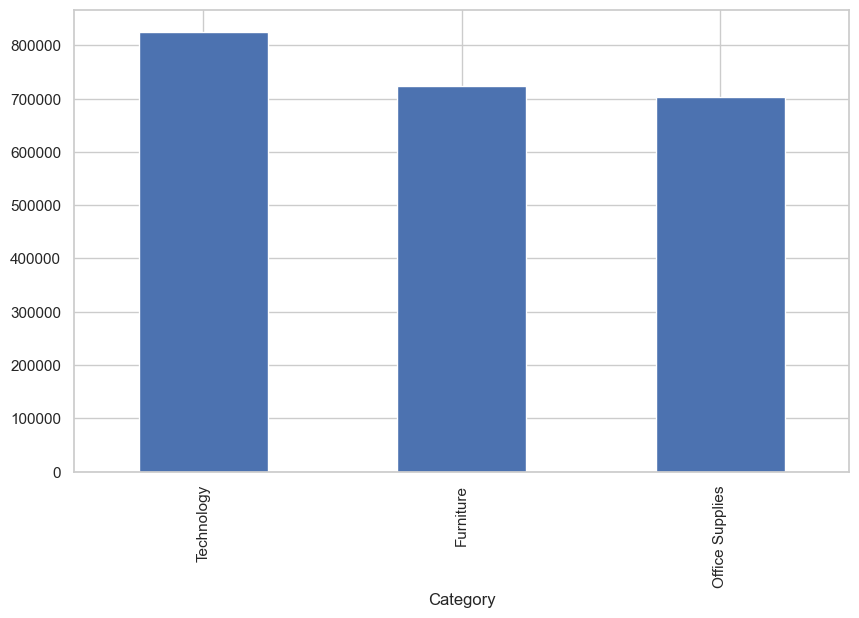

In [10]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar')

<Axes: xlabel='Sales', ylabel='Count'>

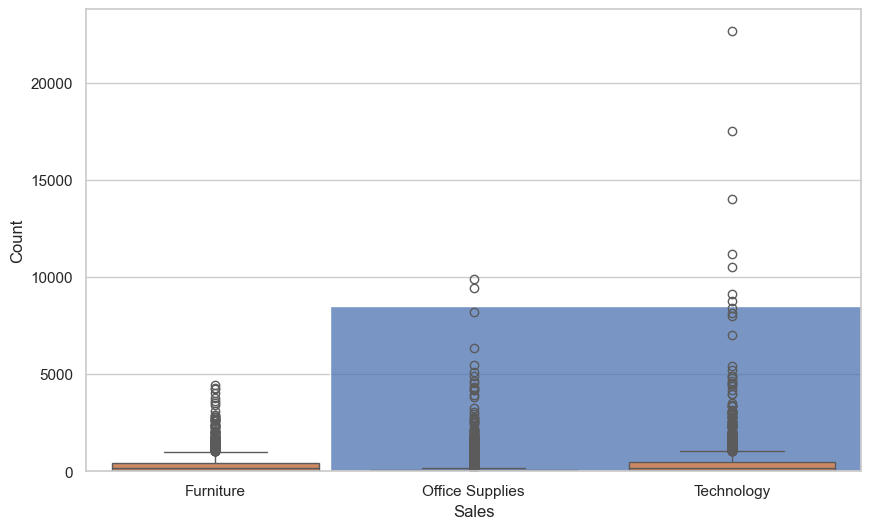

In [11]:
sns.histplot(df['Sales'], bins=50)
sns.boxplot(x='Category', y='Sales', data=df)

# Sales by region/country/city

<Axes: xlabel='Region'>

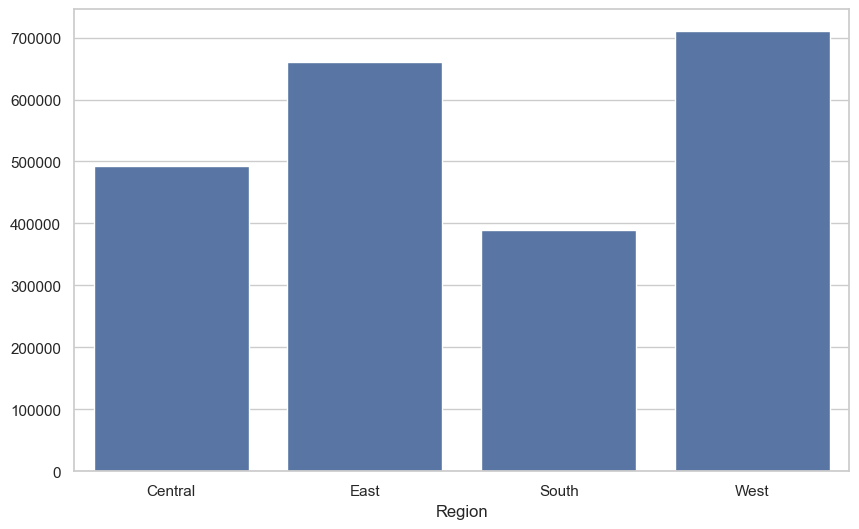

In [12]:
region_sales = df.groupby('Region')['Sales'].sum()
sns.barplot(x=region_sales.index, y=region_sales.values)

In [13]:
fig = px.bar(df.groupby('Region')['Sales'].sum().reset_index(), x='Region', y='Sales')
fig.show()

# Sales over time

<Axes: xlabel='Month'>

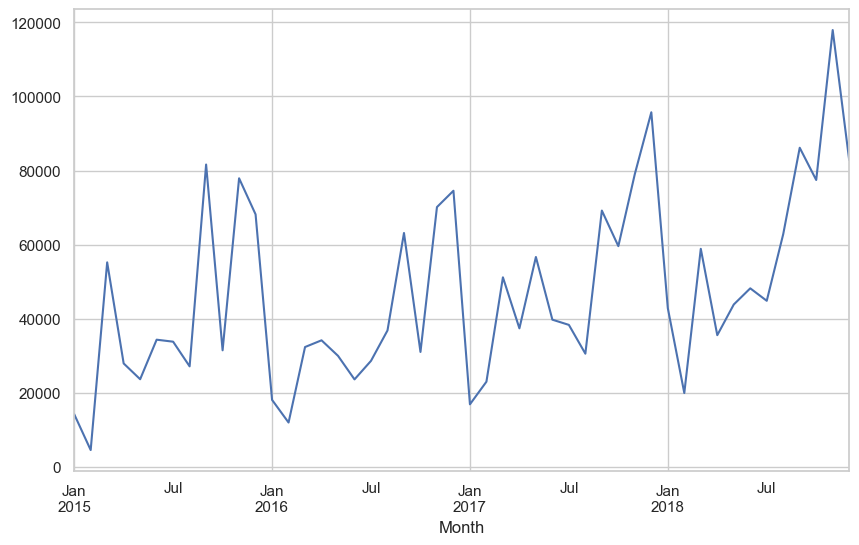

In [14]:
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='line')


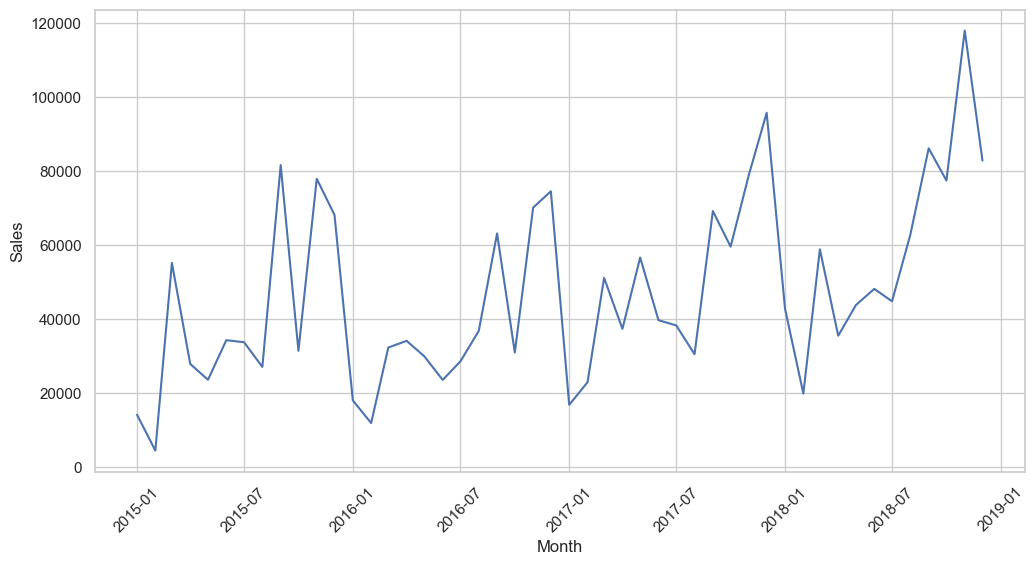

In [15]:
df_grouped = df.groupby('Month')['Sales'].sum().reset_index()
df_grouped['Month'] = df_grouped['Month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales', data=df_grouped)
plt.xticks(rotation=45)
plt.show()

In [16]:
plt.savefig('../output/sales_by_category.png')


<Figure size 1000x600 with 0 Axes>

In [17]:
df.to_csv('../output/cleaned_sales_data.csv', index=False)


# Best clients and products

In [18]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

print(top_customers)
print("")
print(top_products)

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
H

# Conclusions and Recommendations
- Which product categories sell best? 

**Technology**
- In which regions are sales higher/lower?

**West/South**
- Are there seasonal fluctuations in sales?

**Yes, we can see that towards the end of the year sales are higher than during normal times.**
- Which products and customers generate the most revenue?

**Canon imageCLASS 2200 Advanced Copier and Sean Miller**